# Récupération des données

In [0]:
import pandas

In [0]:
data_curiosity = pandas.read_csv("progress.csv")
data_imitation = pandas.read_csv("imitation_progress.csv")

In [0]:
print(data_curiosity)

       advmean    advstd  best_ret  ...        eplen  eprooms   rewtotal
0     0.633470  0.284476      -inf  ...          NaN      NaN        NaN
1     0.299184  0.149151       0.0  ...   214.500000      1.0        0.0
2     0.258139  0.150890       0.0  ...   305.166667      1.0        0.0
3     0.201525  0.148530       0.0  ...   369.416667      1.0        0.0
4     0.106822  0.132377       0.0  ...   430.954545      1.0        0.0
...        ...       ...       ...  ...          ...      ...        ...
6083  0.001340  0.027766     500.0  ...  1063.890000      2.0  3674700.0
6084  0.004312  0.041126     500.0  ...  1055.060000      2.0  3675500.0
6085 -0.000423  0.027956     500.0  ...  1045.840000      2.0  3678300.0
6086  0.000033  0.023122     500.0  ...  1047.800000      2.0  3679900.0
6087 -0.010317  0.061884     500.0  ...  1020.500000      2.0  3682700.0

[6088 rows x 45 columns]


In [0]:
print(data_curiosity.columns)

Index(['advmean', 'advstd', 'best_ret', 'epcount', 'eprew', 'ev_ext', 'ev_int',
       'mem_available', 'n_rooms', 'n_updates', 'opt_approxkl', 'opt_auxloss',
       'opt_clipfrac', 'opt_ent', 'opt_featvar', 'opt_gradnorm', 'opt_maxfeat',
       'opt_maxkl', 'opt_pg', 'opt_tot', 'opt_vf', 'reset_counter',
       'retextmean', 'retextstd', 'retintmean', 'retintstd', 'rewintmax_norm',
       'rewintmax_unnorm', 'rewintmean_norm', 'rewintmean_unnorm',
       'rewintstd_unnorm', 'rooms', 'tcount', 'time_elapsed', 'tps',
       'vpredextmean', 'vpredextstd', 'vpredintmean', 'vpredintstd',
       'wait_policy_inference', 'wait_step', 'wait_update', 'eplen', 'eprooms',
       'rewtotal'],
      dtype='object')


In [0]:
print(data_imitation)

      advmean    advstd  best_ret  ...       eplen  eprooms  rewtotal
0    0.568559  0.277178      -inf  ...         NaN      NaN       NaN
1    0.264818  0.138309       0.0  ...  219.000000      1.0       0.0
2    0.227439  0.138192       0.0  ...  295.500000      1.0       0.0
3    0.148806  0.135198       0.0  ...  381.263158      1.0       0.0
4    0.117598  0.137268       0.0  ...  397.653846      1.0       0.0
..        ...       ...       ...  ...         ...      ...       ...
413  0.001313  0.016058       0.0  ...  524.500000      1.0       0.0
414 -0.003434  0.014595       0.0  ...  513.450000      1.0       0.0
415 -0.001193  0.015989       0.0  ...  521.840000      1.0       0.0
416  0.000860  0.016603       0.0  ...  536.050000      1.0       0.0
417 -0.001199  0.016548       0.0  ...  528.870000      1.0       0.0

[418 rows x 45 columns]


In [0]:
print(data_imitation.columns)

Index(['advmean', 'advstd', 'best_ret', 'epcount', 'eprew', 'ev_ext', 'ev_int',
       'mem_available', 'n_rooms', 'n_updates', 'opt_approxkl', 'opt_auxloss',
       'opt_clipfrac', 'opt_ent', 'opt_featvar', 'opt_gradnorm', 'opt_maxfeat',
       'opt_maxkl', 'opt_pg', 'opt_tot', 'opt_vf', 'reset_counter',
       'retextmean', 'retextstd', 'retintmean', 'retintstd', 'rewintmax_norm',
       'rewintmax_unnorm', 'rewintmean_norm', 'rewintmean_unnorm',
       'rewintstd_unnorm', 'rooms', 'tcount', 'time_elapsed', 'tps',
       'vpredextmean', 'vpredextstd', 'vpredintmean', 'vpredintstd',
       'wait_policy_inference', 'wait_step', 'wait_update', 'eplen', 'eprooms',
       'rewtotal'],
      dtype='object')


# Mise en forme graphique

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Simple plots

In [0]:
colors = sns.color_palette("colorblind")
marker = itertools.cycle(('+', '*', '.'))
datas = []
model_names = []

datas.append(data_curiosity)
model_names.append("Avec curiosité")

datas.append(data_imitation)
model_names.append("Avec imitation")
#here we can add other models to compare

relevant_columns = ["n_rooms", "eplen", "eprooms", "best_ret", "rewtotal"] #here we can add other column names to compare

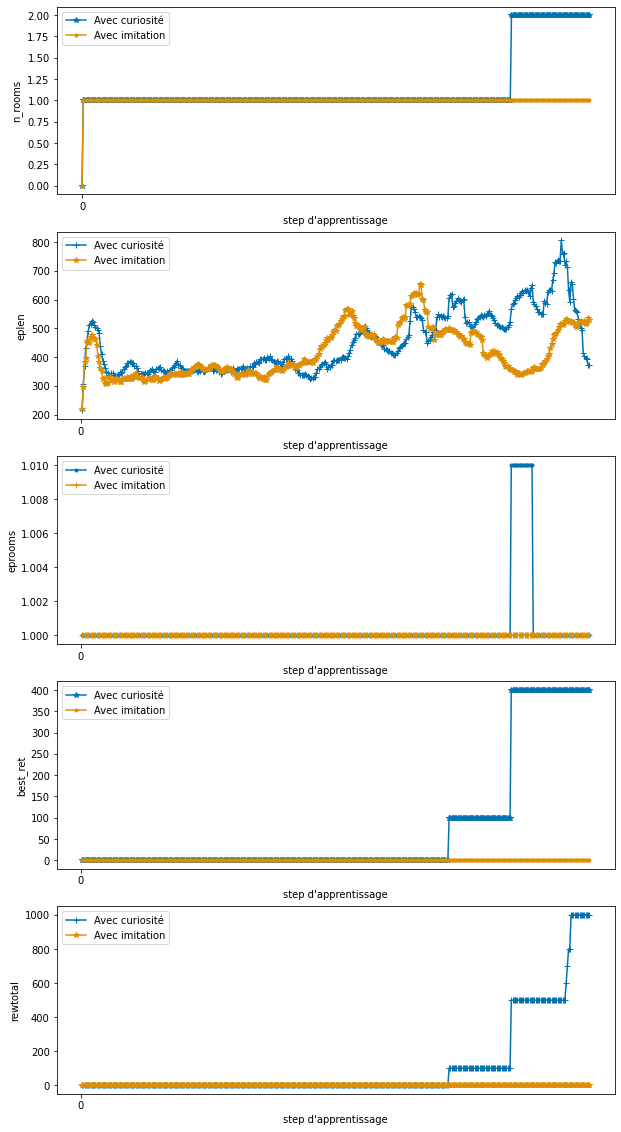

In [0]:
y_min = float("inf")
for data in datas:
  y_min = min(y_min, len(data.index))

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("step d'apprentissage")
  axs[i].set_xticks(np.arange(0, y_min, 2000))
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas:
    axs[i].plot(data[relevant_columns[i]].head(y_min), color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

fig.savefig('curiosity_imitation.pdf')

## Plot of mean over n rows

In [0]:
#calculate mean over n rows
datas_mean = []
n = 200
for data in datas:
  datas_mean.append(data.groupby(np.arange(len(data))//n).mean())

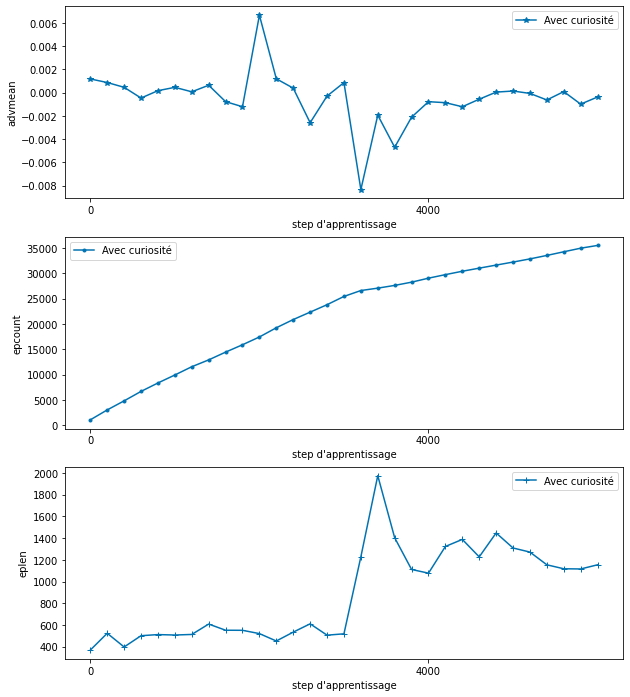

In [0]:
relevant_columns = ["advmean", "epcount", "eplen"] #here we can add other column names to compare

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("step d'apprentissage")
  axs[i].set_xticks(np.arange(0, y_max, 20))
  axs[i].set_xticklabels(np.arange(0, y_max, 20)*200)
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas_mean:
    axs[i].plot(data[relevant_columns[i]], color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

#fig.savefig('figure.pdf')

## Plot of max over n rows

In [0]:
#calculate mean over n rows
datas_max = []
n = 200
for data in datas:
  datas_max.append(data.groupby(np.arange(len(data))//n).max())

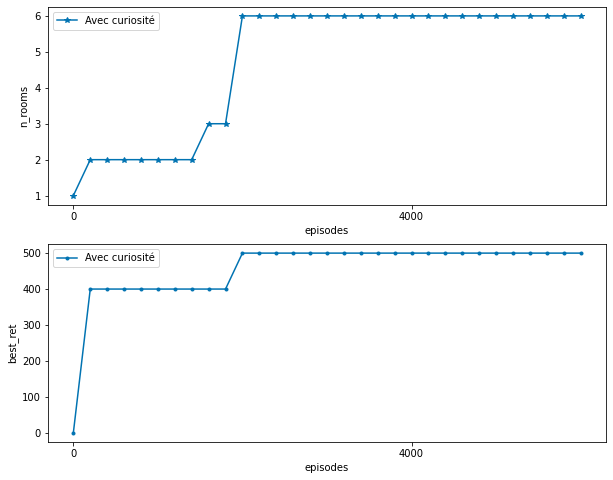

In [0]:
relevant_columns = ["n_rooms", "best_ret"] #here we can add other column names to compare

fig, axs = plt.subplots(len(relevant_columns), 1, figsize=(10,len(relevant_columns)*4))

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

for i in range(len(relevant_columns)):
  axs[i].set_xlabel("episodes")
  axs[i].set_xticks(np.arange(0, y_max, 20))
  axs[i].set_xticklabels(np.arange(0, y_max, 20)*200)
  axs[i].set_ylabel(relevant_columns[i])
  j=0
  for data in datas_max:
    axs[i].plot(data[relevant_columns[i]], color=colors[j], marker=next(marker), label=model_names[j])
    j+=1
  axs[i].legend()

#fig.savefig('figure.pdf')

## Plot of couple of columns (mean, std)

In [0]:
#function to get lighter color
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

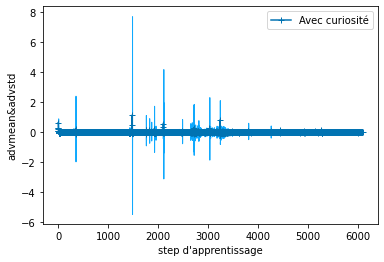

In [0]:
#plot mean and std
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

y_max = 0
for data in datas_mean:
  y_max = max(y_max, len(data.index))

axs.set_xlabel("step d'apprentissage")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')

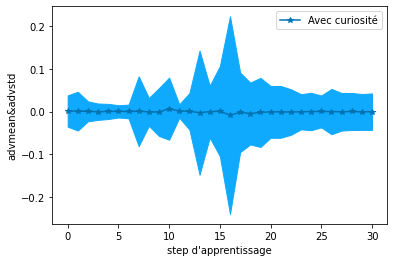

In [0]:
#plot mean and std (on mean values)
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

axs.set_xlabel("step d'apprentissage")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas_mean:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')

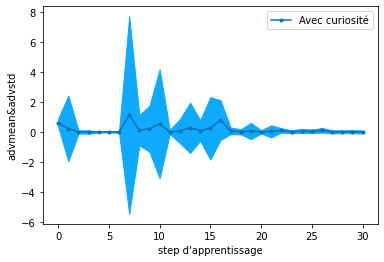

In [0]:
#plot mean and std (on max values)
relevant_couple = ["advmean", "advstd"]

axs = plt.axes()

axs.set_xlabel("step d'apprentissage")
axs.set_ylabel(str(relevant_couple[0])+"&"+str(relevant_couple[1]))
j=0
for data in datas_max:
  axs.plot(data[relevant_couple[0]], color=colors[j], marker=next(marker), label=model_names[j])
  axs.fill_between(range(len(data.index)), data[relevant_couple[0]]-data[relevant_couple[1]], data[relevant_couple[0]]+data[relevant_couple[1]], color=adjust_lightness(colors[j], 1.5))
  j+=1
axs.legend()

#fig.savefig('figure.pdf')